<a href="https://colab.research.google.com/github/malvikaRavichandran/Data_Analysis_Projects/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/Individual_Learnings/titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passenger Id- Id number of passengers in the data set

Name- Name of the passenger

Survival- Person survived or not ( 0 for No & 1 for Yes)

P-class- With what class of ticket that passenger was traveling.

sex- Male Or Female

Age- Age of the person in Years

Sibsp- Number of siblings/spouses on the Titanic

parch- Number of parents/children on the Titanic

Ticket- Ticket number

Fare- Amount of money that person paid to travel

Cabin- Cabin Number of Passenger

Embarked- Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [18]:
print("Shape of data is :",train.shape)
train.info()

Shape of data is : (891, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

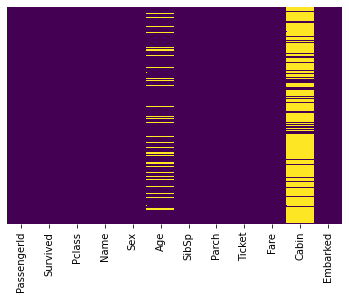

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see from the diagram the column ‘Age’ and ‘Cabin’ have got null values. While ‘Cabin’ has huge amount null values, ‘Age’ has moderate amount of null values.

Here we would drop the ‘Cabin’ column as it has got mostly NULL values.

In [13]:
train.drop('Cabin',axis=1,inplace=True)

The following features do not provide much information - dropping from dataset

In [25]:
train = train.drop(["PassengerId", "Name" , "Ticket" ],axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Sex VS Survived**

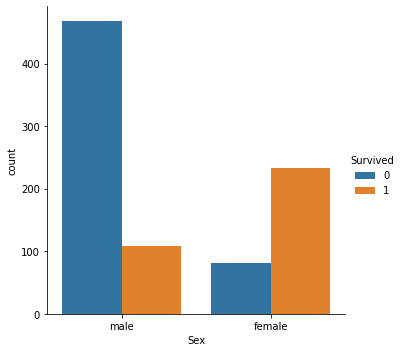

In [7]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

It can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

**Pclass VS Survived**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


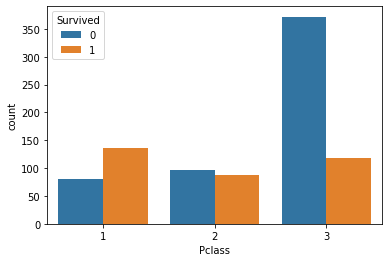

In [21]:
sns.countplot(train["Pclass"],hue = train["Survived"])

Determines if higher-class passengers had more survival rate than the lower class ones or vice versa. 
Class 1 passengers have a higher survival chance compared to classes 2 and 3.
Person who was traveling in 3rd class has higher chances to die. Persons who were traveling in higher class like 1st has higher chance to survive. 

It implies that Pclass contributes a lot to a passenger’s survival rate.

**Sibling - Sibsp**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


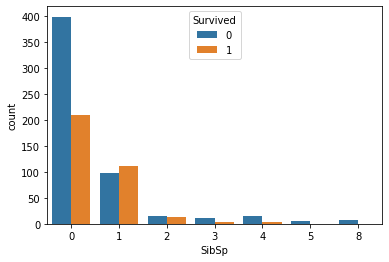

In [23]:
sns.countplot(train["SibSp"],hue = train["Survived"],data = train)

SibSp variable refers to the number of sibling or spouse the person was accompanied with. We can see most of the people came alone.


**Parch VS Survived**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


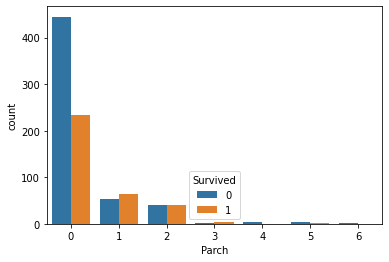

In [24]:
sns.countplot(train["Parch"],hue = train["Survived"],data = train)

**Age VS Survived**

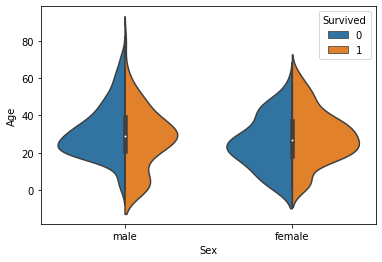

In [9]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

This graph gives a summary of the age range of men, women and children who were saved.


Age has a lot of missing values, imputing with median of age

In [26]:
train['Age']=train.groupby(["Pclass",'Sex'])["Age"].apply(lambda x: x.fillna(x.median()))
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

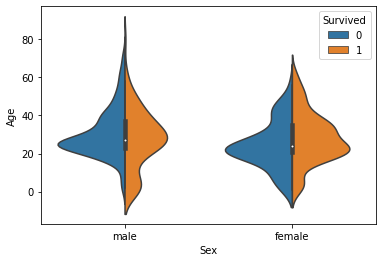

In [27]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

**Fare VS Survived**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


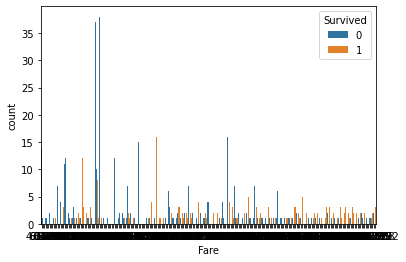

In [32]:
sns.countplot(train["Fare"],hue = train["Survived"],data = train)

**Embarked vs Survived**

In [28]:
train['Embarked'].isnull().sum()

2

In [33]:
train["Embarked"].fillna("S", inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


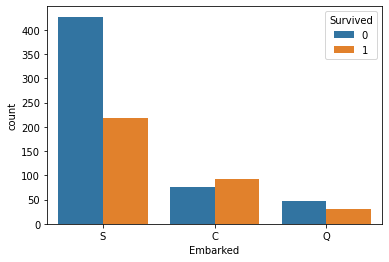

In [34]:
sns.countplot(train["Embarked"],hue = train["Survived"],data = train)